# Conceptos teóricos

Para entrenar nuestra primera red neuronal vamos a utilizar **TensorFlow** y **Keras**.

## TensorFlow

**TensorFlow** es una librería de código abierto desarrollada por Google para construir y entrenar modelos de Machine Learning y Deep Learning.

Permite:

* Crear redes neuronales
* Definir funciones de pérdida
* Aplicar algoritmos de optimización
* Trabajar con tensores (estructuras matemáticas que almacenan datos)

TensorFlow se encarga de realizar todos los cálculos matemáticos necesarios para que el modelo aprenda, incluyendo el cálculo de gradientes y la actualización de pesos.

## Keras

**Keras** es una API de alto nivel integrada dentro de TensorFlow que simplifica la creación de redes neuronales.

En lugar de programar todos los cálculos manualmente, con Keras podemos:

* Definir capas en pocas líneas de código
* Especificar la función de pérdida
* Elegir el optimizador
* Entrenar el modelo fácilmente

Por ejemplo, crear una red sencilla puede hacerse en apenas unas líneas.

## Relación entre ambos

Podemos pensar que:

* **TensorFlow** es el motor matemático.
* **Keras** es la interfaz sencilla que utilizamos para trabajar con ese motor.

En este notebook utilizaremos Keras sobre TensorFlow para construir nuestra primera red neuronal que aprenderá a convertir grados Celsius en Fahrenheit.

## Componentes de Tensorflow

En TensorFlow, todo se representa mediante **tensores**.

Un tensor es simplemente una estructura que almacena números, pero puede tener distintas dimensiones:

* 🔹 **Escalar** → un único número (dimensión 0)
* 🔹 **Vector** → una lista de números (dimensión 1)
* 🔹 **Matriz** → una tabla de números (dimensión 2)
* 🔹 Tensor de dimensión mayor → estructuras más complejas (por ejemplo, imágenes en 3D o 4D)

Por ejemplo:

* Una temperatura individual → escalar
* Una lista de temperaturas → vector
* Un conjunto de datos con varias características → matriz

Cuando entrenamos una red neuronal:

* Las **entradas** son tensores.
* Las **salidas** son tensores.
* Los **pesos y sesgos** también son tensores.
* Las operaciones matemáticas se realizan entre tensores.

---

### ¿Por qué necesitamos tensores?

Las redes neuronales funcionan realizando operaciones matemáticas masivas:

* Multiplicaciones
* Sumas
* Cálculo de gradientes
* Actualización de pesos

TensorFlow está optimizado para realizar estas operaciones de forma muy eficiente, incluso usando GPU.

En nuestro ejemplo de Celsius → Fahrenheit:

* El conjunto de temperaturas en Celsius será un tensor.
* Las temperaturas en Fahrenheit también serán un tensor.
* El peso y el sesgo que la red aprenderá serán tensores internos del modelo.

---

### ¿Qué necesitas saber realmente para empezar?

Para trabajar con TensorFlow y Keras en este primer ejemplo solo necesitas entender que:

* Los datos deben estar en formato numérico.
* Normalmente trabajaremos con arrays (que TensorFlow convertirá en tensores).
* El modelo ajustará automáticamente los tensores que representan los pesos.

No necesitamos manipular tensores complejos manualmente en este ejemplo.
Keras se encargará de gran parte del trabajo por nosotros.

# Primera red neuronal

Sabemos que la fórmula matemática que convierte grados Celsius a Fahrenheit es:

$$
F = 1.8C + 32
$$

Es una relación lineal sencilla, con una pendiente (1.8) y un término independiente (32).

Ahora bien, en lugar de programar directamente esa ecuación, vamos a hacer algo diferente: vamos a entrenar una red neuronal para que la aprenda por sí sola a partir de ejemplos.

Vamos a implementar un perceptrón que permita calcular la conversión de grados Celsius a Fahrenheit. El modelo no conocerá la fórmula explícitamente; solo verá pares de valores (Celsius, Fahrenheit) y ajustará sus parámetros internos hasta aproximarse a esa relación.

## Importar librerías

In [1]:
# Importamos las librerías necesarias
import tensorflow as tf
import numpy as np

## Lectura (creación) del dataset

In [2]:
# Creamos los datos de entrenamiento. Al ser un dataset muy sencillo,
# podemos crear nosotros los datos

# Temperaturas en Celsius (entrada)
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)

# Temperaturas correspondientes en Fahrenheit (salida esperada)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

print("Datos de entrada:", celsius)
print("Datos de salida:", fahrenheit)

Datos de entrada: [-40. -10.   0.   8.  15.  22.  38.]
Datos de salida: [-40.  14.  32.  46.  59.  72. 100.]


## Definición del modelo

En este paso vamos a construir nuestra red neuronal utilizando Keras.

Veamos qué significa cada parte del código:

### `Sequential`

Un **modelo secuencial** es el tipo más sencillo de red neuronal en Keras.

Se llama así porque las capas se apilan **una detrás de otra**, en orden.
La salida de una capa se convierte automáticamente en la entrada de la siguiente.

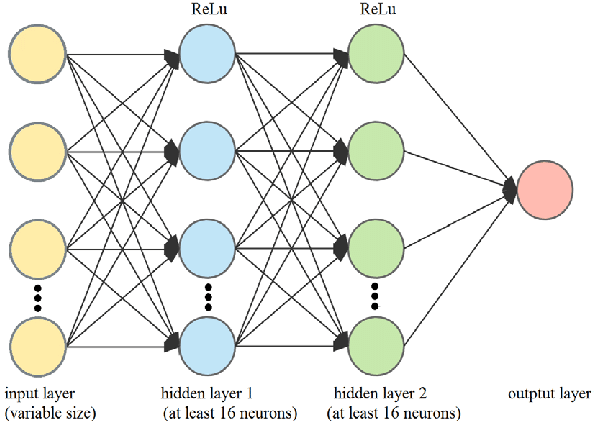

Es adecuado cuando:

* La red tiene un flujo lineal.
* No necesitamos arquitecturas complejas con múltiples ramas.

En nuestro caso solo tenemos una capa, así que un modelo secuencial es suficiente.

### `Dense`

Una **capa densa** (fully connected layer) es una capa en la que:

* Cada neurona está conectada a todas las entradas.
* Cada conexión tiene su propio peso.
* La neurona calcula una suma ponderada más un sesgo.

En este ejemplo estamos creando una capa densa con una sola neurona, es decir, un perceptrón.

### `units=1`

El parámetro `units` indica el número de neuronas que tendrá la capa.

Como estamos resolviendo un problema muy simple (convertir un número en otro número), solo necesitamos:

* 1 neurona
* 1 valor de salida

Si pusiéramos `units=10`, estaríamos creando 10 neuronas en esa capa.

### `input_shape=[1]`

`input_shape` indica la forma de los datos de entrada.

En este caso:

* `[1]` significa que cada ejemplo tiene una sola característica.
* Es decir, cada entrada es un único número (grados Celsius).

Si tuviéramos varias características (por ejemplo temperatura, humedad y presión), el `input_shape` sería `[3]`.

In [3]:
# Definimos el modelo (un perceptrón)

# Creamos un modelo secuencial con una sola capa y una sola neurona
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # 1 neurona, 1 entrada
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilación del modelo

Antes de entrenar la red neuronal, debemos **compilar el modelo**.

Compilar significa preparar el modelo para el entrenamiento indicando tres elementos fundamentales:

### Optimizador (`optimizer`)

El optimizador es el algoritmo que se encargará de **actualizar los pesos y el sesgo** para reducir la función de pérdida.

En este caso usamos **Adam**, uno de los optimizadores más utilizados en Deep Learning.

También indicamos el `learning_rate`, que controla cuánto se modifican los pesos en cada actualización.

### Función de pérdida (`loss`)

La función de pérdida mide el error entre:

* El valor real
* El valor predicho por el modelo

Como estamos resolviendo un problema de regresión, usamos el **error cuadrático medio (MSE)**.

In [4]:
# Compilamos el modelo

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),  # Optimizador
    loss='mean_squared_error'  # Función de pérdida para regresión
)

## Entrenar el modelo

Aquí es donde realmente se ajustan los pesos y sesos del modelo.

In [14]:
# Entrenamos el modelo

print("Entrenando el modelo...")

# Entrenamos el modelo con los datos de entrada y salida
historial_poco_entrenado = model.fit(
    celsius,        # Datos de entrada (grados Celsius)
    fahrenheit,     # Valores reales que el modelo debe aprender (Fahrenheit)
    epochs=10,     # Número de veces que el modelo recorrerá todo el dataset
    verbose=True   # Si es True muestra el progreso de cada época
)

print("Entrenamiento finalizado.")


Entrenando el modelo...
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 763.1239
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 759.3403
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 756.2557
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 753.6489
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 751.3306
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 749.1415
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 746.9512
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 744.6561
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 742.1766
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 739.4561
Entrenamiento finalizado.


## Visualizar la evolución de la pérdida

Después de entrenar el modelo, podemos observar cómo ha evolucionado la función de pérdida a lo largo de las épocas.

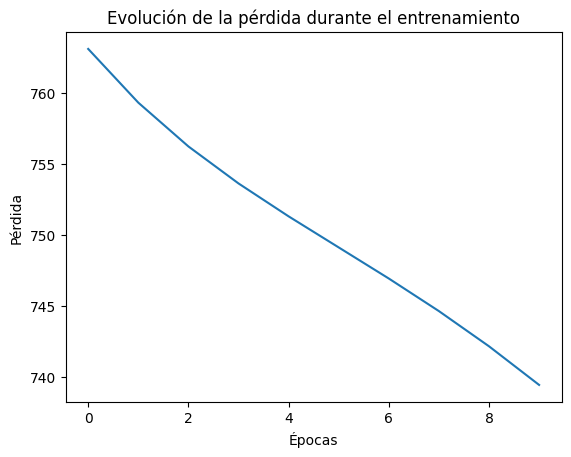

In [23]:
# Visualizamos la evolución de la pérdida

import matplotlib.pyplot as plt

plt.plot(historial_poco_entrenado.history['loss'])
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.show()


## Probar el modelo

Con las pocas epochs que hemos usado, el resultado que obtenemos no es el que queríamos

In [21]:
# Probamos el modelo con un nuevo valor

print("Predicción para 100°C (deberían ser 212ºF):")

nuevo_valor = np.array([[100.0]], dtype=float)  # Forma (1,1)
resultado = model.predict(nuevo_valor, verbose=False)

print(str(resultado))

Predicción para 100°C (deberían ser 212ºF):
[[225.21922]]


Podemos ver el peso y sesgo que se han generado, observando que se no parece al resultado que debíamos obtener:

$$
F = 1.8C + 32
$$

Con esos valores, tu modelo ha aprendido la siguiente fórmula:

$$
F \approx 2.206241 \cdot C + 4.595136
$$

In [22]:
# Mostramos los parámetros aprendidos

weights = model.get_weights()

print("Peso aprendido (w):", weights[0])
print("Sesgo aprendido (b):", weights[1])

Peso aprendido (w): [[2.206241]]
Sesgo aprendido (b): [4.595136]


# Perceptrón mejor entrenado

En este ejemplo vamos a ver los resultados que podemos obtener si cambiamos las épocas. Recuerda que puedes jugar con todos los hiperparámetros (learning_rate, etc)

In [24]:
# Entrenamos el modelo

print("Entrenando el modelo...")

# Entrenamos el modelo con los datos de entrada y salida
historial_muy_entrenado = model.fit(
    celsius,
    fahrenheit,
    epochs=1000,     # Número de veces que el modelo recorrerá todo el dataset
    verbose=False   # Si es True muestra el progreso de cada época
)

print("Entrenamiento finalizado.")


Entrenando el modelo...
Entrenamiento finalizado.


## Visualizar la evolución de la pérdida

Después de entrenar el modelo, podemos observar cómo ha evolucionado la función de pérdida a lo largo de las épocas.

Cerca de las 400 épocas se llega a los mejores resultados. Podríamos acortar el entrenamiento.

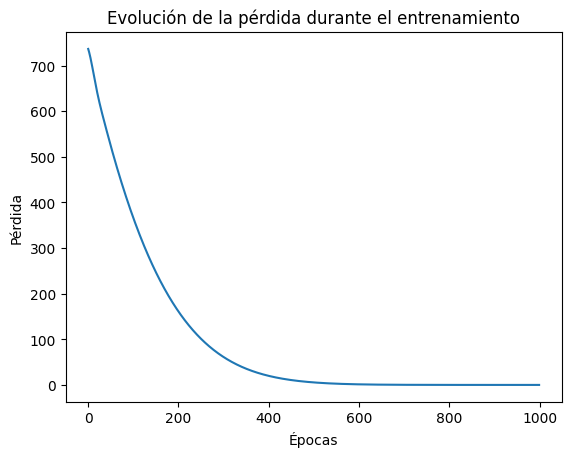

In [25]:
# Visualizamos la evolución de la pérdida

import matplotlib.pyplot as plt

plt.plot(historial_muy_entrenado.history['loss'])
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.show()


## Probar el modelo

In [26]:
# Probamos el modelo con un nuevo valor

print("Predicción para 100°C (deberían ser 212ºF):")

nuevo_valor = np.array([[100.0]], dtype=float)  # Forma (1,1)
resultado = model.predict(nuevo_valor, verbose=False)

print(str(resultado))

Predicción para 100°C (deberían ser 212ºF):
[[211.74399]]


Podemos ver el peso y sesgo que se han generado, observando que se parece al resultado que debíamos obtener:

$$
F = 1.8C + 32
$$

Con esos valores, tu modelo ha aprendido la siguiente fórmula:

$$
F \approx 1.7981666 \cdot C + 31.92732
$$

In [27]:
# Mostramos los parámetros aprendidos

weights = model.get_weights()

print("Peso aprendido (w):", weights[0])
print("Sesgo aprendido (b):", weights[1])

Peso aprendido (w): [[1.7981666]]
Sesgo aprendido (b): [31.92732]


# Red neuronal más compleja: red densa

Hasta ahora hemos utilizado un único perceptrón, es decir, una sola neurona.  
Eso nos permitía modelar directamente una relación lineal.

Ahora vamos a construir una red ligeramente más compleja añadiendo dos **capas ocultas densa**.

Aunque el problema de Celsius → Fahrenheit es lineal y puede resolverse con una sola neurona, esta nueva arquitectura nos permitirá observar:

- Cómo se conectan varias neuronas entre sí.
- Cómo se distribuye el aprendizaje entre más pesos y sesgos.
- Cómo puede mejorar la velocidad de convergencia.

El objetivo no es resolver un problema más difícil, sino entender cómo funciona una red con más capacidad.


In [28]:
# Red neuronal densa con DOS capas ocultas
# De momento no nos preocupamos por las funciones de activcación (ya las veremos)
model_densa = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu", input_shape=[1]),  # 1ª capa oculta (8 neuronas)
    tf.keras.layers.Dense(8, activation="relu"),                   # 2ª capa oculta (8 neuronas)
    tf.keras.layers.Dense(1)                                       # Capa de salida (1 valor: Fahrenheit)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compilación (regresión)
model_densa.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss="mean_squared_error"
)

In [31]:
# Entrenamos
history_densa = model_densa.fit(
    celsius,
    fahrenheit,
    epochs=500,
    verbose=True
)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 25.3012
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 23.3917
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 21.8960
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 20.1936
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 18.1306
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 17.2000
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 16.0613
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 14.9657
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.3193
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 13.1116
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.0456
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.4312
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.6142
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.1370
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.7448
Epoch

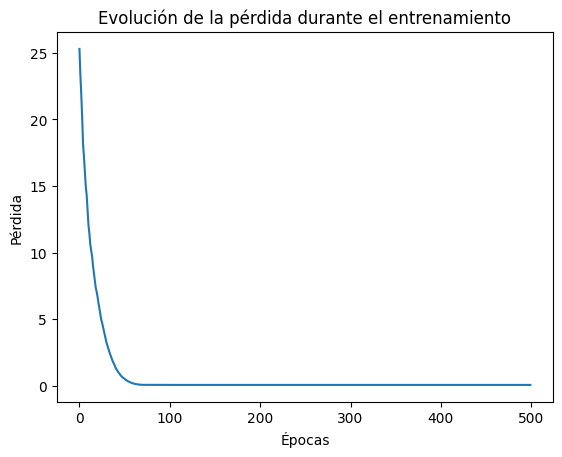

In [33]:
# Ten en cuenta que hemos cambiado nº de épocas y learning_rate
plt.plot(history_densa.history['loss'])
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.show()

Con unas 80 épocas ha conseguido llegar a un resultado muy bueno, mientras que el modelo anterior necesitaba cerca de las 200.

In [34]:
# Predicción de prueba
nuevo_valor = np.array([[100.0]], dtype=float)
pred = model_densa.predict(nuevo_valor, verbose=False)

print(f"Predicción para 100°C: {pred[0][0]:.2f} °F (debería ser 212°F)")

Predicción para 100°C: 217.00 °F (debería ser 212°F)


In [35]:
# ✅ Mostrar pesos y sesgos (bias) de TODAS las capas
# En una red con varias capas, habrá MUCHOS más parámetros, por eso ya no es tan interpretable
# como la ecuación lineal F = w*C + b del perceptrón.

for i, layer in enumerate(model_densa.layers):
    w, b = layer.get_weights()  # w: matriz de pesos, b: vector de sesgos
    print(f"\n--- Capa {i+1}: {layer.name} ---")
    print("Pesos (shape):", w.shape)
    print(w)
    print("Sesgos (shape):", b.shape)
    print(b)

# ✅ Resumen del modelo para ver cuántos parámetros hay en total
print("\nResumen del modelo:")
model_densa.summary()



--- Capa 1: dense_1 ---
Pesos (shape): (1, 8)
[[-0.53982216 -0.59358245  0.40295464 -0.06530577 -0.08997732 -0.5612897
   0.32220602  0.776335  ]]
Sesgos (shape): (8,)
[-0.9698465 -3.1779912  5.199164  -3.889454   3.8129797 -2.978388
  4.9298887  5.3314695]

--- Capa 2: dense_2 ---
Pesos (shape): (8, 8)
[[ 0.26617855  0.29039782 -0.5943628  -0.585281    0.14402609 -0.6018326
   0.3306288  -0.42148846]
 [-0.84232914 -1.2806851   1.1081485   0.3347853   0.20950224  1.0570513
  -0.84922975 -1.0708835 ]
 [ 0.90152264 -0.22308612 -0.92774945 -0.44351947 -0.5366867  -0.6227226
  -0.78907746 -0.37329996]
 [-0.7486056  -1.2247148   0.74443865 -0.25938803  0.5439839   1.0228335
  -0.70693207 -0.8139165 ]
 [ 0.84447396 -0.20154485 -0.3869922  -0.21103872 -1.8974774  -0.5314313
  -1.9582725  -0.38666838]
 [-0.655073   -0.25768256  1.4661338   0.6285229   0.10141685  1.2345933
  -0.5025881  -0.6222802 ]
 [ 0.8216861  -0.27918336 -0.06727701 -1.2747579   0.53095263 -0.45089215
  -0.5817642   0.378

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

## Interpretación red neuronal densa

## 🔎 ¿Qué significa **Param #**?

**Param #** indica el número total de parámetros entrenables en esa capa.

Es decir:

👉 Número total de **pesos + sesgos (bias)** que la red debe aprender.

Cada uno de esos parámetros se ajusta durante el entrenamiento.

---

## Vamos capa por capa

### Primera capa: `(None, 8)` → 16 parámetros

Tienes:

* 1 entrada
* 8 neuronas

Cada neurona tiene:

* 1 peso (porque hay 1 entrada)
* 1 sesgo

Entonces:

```
(1 peso × 8 neuronas) + (8 sesgos) = 8 + 8 = 16
```

✔ Coincide con lo que muestra: **16**

---

### 🟢 Segunda capa: `(None, 8)` → 72 parámetros

Ahora la capa anterior tiene 8 neuronas.

Eso significa:

* 8 entradas
* 8 neuronas

Cada neurona tiene:

* 8 pesos
* 1 sesgo

Entonces:

```
(8 × 8) + 8 = 64 + 8 = 72
```

✔ Coincide: **72**

---

### 🟢 Capa de salida: `(None, 1)` → 9 parámetros

Tiene:

* 8 entradas
* 1 neurona

Entonces:

```
(8 × 1) + 1 = 8 + 1 = 9
```

✔ Coincide: **9**

---

## Total de parámetros

Si los sumas:

```
16 + 72 + 9 = 97 parámetros
```

Eso significa que esta red está ajustando **97 números distintos**.

Compáralo con el perceptrón inicial:

* Solo tenía 2 parámetros (w y b).

Por eso ya no es interpretable.

Antes:

[
F = 1.8C + 32
]

Ahora:

* 97 parámetros
* Varias combinaciones intermedias
* Transformaciones no lineales

Ya no puedes escribir una ecuación simple.